In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image,ImageFilter
import cv2
import keras
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.optimizers import Adam

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
def ConvLayers(layers, model, filters):
  for i in range(layers):
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(filters, 3,3,activation='relu'))
  model.add(MaxPooling2D((2,2),strides=(1,1),padding="same"))
def FCLayers(model):
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
def VGG16_arc():
  model=Sequential()
  ConvLayers(2,model,64)
  ConvLayers(2,model,128)
  ConvLayers(3,model,256)
  ConvLayers(3,model,512)
  ConvLayers(3,model,512)
  model.add(Flatten())
  FCLayers(model)
  FCLayers(model)
  model.add(Dense(37,activation='sigmoid'))
  #model.add(Dense(3,activation='softmax'))
  return model

In [6]:
#Model compilation
optimizer = Adam(lr=0.001, decay=5e-4)
model = VGG16_arc()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) 

In [7]:
model.build(input_shape=(None,224,224,3))

In [8]:
model.load_weights('/content/gdrive/MyDrive/thirdrunweights.hdf5')

In [72]:
def preprocessing(imagepath):
  img=Image.open(imagepath)
  resized=img.resize((224,224))
  medfil=resized.filter(ImageFilter.MedianFilter(size = 3)) 
  open_cv_image = np.array(medfil) 
  # Convert RGB to BGR 
  open_cv_image = open_cv_image[:, :, ::-1].copy() 
  ycb=cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2LAB) # Converting RGB to LAB colorscale
  imgs=cv2.split(ycb)  # Splitting Channels of LAB Colorscale.
  clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(3,3)) # Creating CLAHE(Clip limit:sets threshhold for contrast limiting.)
  # tilegridesize:used for subimages for applying clahe.
  imgs[0]= clahe.apply(imgs[0]) # Applying Clahe on luminescence channel
  labimg=cv2.merge(imgs)   # Merging channels of LAB.
  labimg=cv2.cvtColor(labimg,cv2.COLOR_LAB2BGR) # Converting back LAB to RGB color scale in BGR format
  RGBimage = labimg[...,::-1] #BGR to RGB
  return RGBimage

In [76]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def prediction(image):
  img_array = img_to_array(image)
  img_batch = np.expand_dims(img_array, axis=0)
  predictarray=model.predict(img_batch)
  return predictarray

predictarray=prediction(image)

In [77]:
classes = ['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1','Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3','Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3','Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4', 'Class11.5', 'Class11.6'
]

In [95]:
def class7():
  if ((predictdf['Class7.1']>predictdf['Class7.2']) & (predictdf['Class7.1']>predictdf['Class7.3'])).any():
    print('The Galaxy Is Completely Round')
    class6()
  elif ((predictdf['Class7.2']>predictdf['Class7.1']) & (predictdf['Class7.2']>predictdf['Class7.3'])).any():
    print('The Galaxy Is Neither Completely Round Nor Cigar Shaped (In Between)')
    class6()
  elif ((predictdf['Class7.3']>predictdf['Class7.1']) & (predictdf['Class7.3']>predictdf['Class7.2'])).any():
    print('The Galaxy Is Cigar Shaped')
    class6()

def class6():
  if (predictdf['Class6.1']>predictdf['Class6.2']).any():
    class8()
  elif (predictdf['Class6.2']>predictdf['Class6.1']).any():
    print('The Galaxy Has No Odd Feature')
def class8():
  if ((predictdf['Class8.1']>predictdf['Class8.2']) & (predictdf['Class8.1']>predictdf['Class8.3']) & (predictdf['Class8.1']>predictdf['Class8.4']) & (predictdf['Class8.1']>predictdf['Class8.5']) & (predictdf['Class8.1']>predictdf['Class8.6']) & (predictdf['Class8.1']>predictdf['Class8.7'])).any():
    print('Odd Feature - Ring')
  elif ((predictdf['Class8.2']>predictdf['Class8.1']) & (predictdf['Class8.2']>predictdf['Class8.3']) & (predictdf['Class8.2']>predictdf['Class8.4']) & (predictdf['Class8.2']>predictdf['Class8.5']) & (predictdf['Class8.2']>predictdf['Class8.6']) & (predictdf['Class8.2']>predictdf['Class8.7'])).any():
    print('Odd Feature - Lens Or Arc')
  elif ((predictdf['Class8.3']>predictdf['Class8.1']) & (predictdf['Class8.3']>predictdf['Class8.2']) & (predictdf['Class8.3']>predictdf['Class8.4']) & (predictdf['Class8.3']>predictdf['Class8.5']) & (predictdf['Class8.3']>predictdf['Class8.6']) & (predictdf['Class8.3']>predictdf['Class8.7'])).any():
    print('Odd Feature - Disturbed')
  elif ((predictdf['Class8.4']>predictdf['Class8.1']) & (predictdf['Class8.4']>predictdf['Class8.2']) & (predictdf['Class8.4']>predictdf['Class8.3']) & (predictdf['Class8.4']>predictdf['Class8.5']) & (predictdf['Class8.4']>predictdf['Class8.6']) & (predictdf['Class8.4']>predictdf['Class8.7'])).any():
    print('Odd Feature - Irregular')
  elif ((predictdf['Class8.5']>predictdf['Class8.1']) & (predictdf['Class8.5']>predictdf['Class8.2']) & (predictdf['Class8.5']>predictdf['Class8.3']) & (predictdf['Class8.5']>predictdf['Class8.4']) & (predictdf['Class8.5']>predictdf['Class8.6']) & (predictdf['Class8.5']>predictdf['Class8.7'])).any():
    print('Odd Feature - Other')
  elif ((predictdf['Class8.6']>predictdf['Class8.1']) & (predictdf['Class8.6']>predictdf['Class8.2']) & (predictdf['Class8.6']>predictdf['Class8.3']) & (predictdf['Class8.6']>predictdf['Class8.4']) & (predictdf['Class8.6']>predictdf['Class8.5']) & (predictdf['Class8.6']>predictdf['Class8.7'])).any():
    print('Odd Feature - Merger')
  elif ((predictdf['Class8.7']>predictdf['Class8.1']) & (predictdf['Class8.7']>predictdf['Class8.2']) & (predictdf['Class8.7']>predictdf['Class8.3']) & (predictdf['Class8.7']>predictdf['Class8.4']) & (predictdf['Class8.7']>predictdf['Class8.5']) & (predictdf['Class8.7']>predictdf['Class8.6'])).any():
    print('Odd Feature - Dust Lane')

def class2():
  if (predictdf['Class2.1']>predictdf['Class2.2']).any():
    print('The Disk Can Be Viewed Edge-on')
    class9()
  elif (predictdf['Class2.2']>predictdf['Class2.1']).any():
    print('The Disk Cannot Be Viewed Edge-on')
    class3()

def class9():
  if ((predictdf['Class9.1']>predictdf['Class9.2']) & (predictdf['Class9.1']>predictdf['Class9.3'])).any():
    print('The Galaxy Has A Rounded Bulge At Its Centre')
    class6()
  elif ((predictdf['Class9.2']>predictdf['Class9.1']) & (predictdf['Class9.2']>predictdf['Class9.3'])).any():
    print('The Galaxy Has A Boxy Bulge At Its Centre')
    class6()
  elif ((predictdf['Class9.3']>predictdf['Class9.1']) & (predictdf['Class9.3']>predictdf['Class9.2'])).any():
    print('The Galaxy Has No Bulge At Its Centre ')
    class6()
  
def class3():
  if (predictdf['Class3.1']>predictdf['Class3.2']).any():
    print('There Is A Sign Of A Bar Feature Through The Centre Of The Galaxy')
    class4()
  elif (predictdf['Class3.2']>predictdf['Class3.1']).any():
    print('There Is No Sign Of A Bar Feature Through The Centre Of The Galaxy')
    class4()
  
def class4():
  if (predictdf['Class4.1']>predictdf['Class4.2']).any():
    print('There Is A Sign Of A Spiral Arm Pattern')
    class10()
  elif (predictdf['Class4.2']>predictdf['Class4.1']).any():
    print('There Is No Sign Of A Spiral Arm Pattern')
    class5()

def class10():
  if ((predictdf['Class10.1']>predictdf['Class10.2']) & (predictdf['Class10.1']>predictdf['Class10.3'])).any():
    print('The Spiral Arms Appear To Be Tightly Wound')
    class11()
  elif ((predictdf['Class10.2']>predictdf['Class10.1']) & (predictdf['Class10.2']>predictdf['Class10.3'])).any():
    print('The Spiral Arms Appear To Be Neither Tightly Nor Loosely Wound (Medium)')
    class11()
  elif ((predictdf['Class10.3']>predictdf['Class10.1']) & (predictdf['Class10.3']>predictdf['Class10.2'])).any():
    print('The Spiral Arms Appear To Be Loosely Wound')
    class11()

def class5():
  if ((predictdf['Class5.1']>predictdf['Class5.2']) & (predictdf['Class5.1']>predictdf['Class5.3']) & (predictdf['Class5.1']>predictdf['Class5.4'])).any():
    print('The Galaxy Has No Central Bulge')
    class6()
  elif ((predictdf['Class5.2']>predictdf['Class5.1']) & (predictdf['Class5.2']>predictdf['Class5.3']) & (predictdf['Class5.2']>predictdf['Class5.4'])).any():
    print('The Galaxy Has A Central Bulge That Is Just Noticeable')
    class6()
  elif ((predictdf['Class5.3']>predictdf['Class5.1']) & (predictdf['Class5.3']>predictdf['Class5.2']) & (predictdf['Class5.3']>predictdf['Class5.4'])).any():
    print('The Galaxy Has An Obvious Central Bulge')
    class6()
  elif ((predictdf['Class5.4']>predictdf['Class5.1']) & (predictdf['Class5.4']>predictdf['Class5.2']) & (predictdf['Class5.4']>predictdf['Class5.3'])).any():
    print('The Galaxy Has A Dominant Central Bulge')
    class6()

def class11():
  if ((predictdf['Class11.1']>predictdf['Class11.2']) & (predictdf['Class11.1']>predictdf['Class11.3']) & (predictdf['Class11.1']>predictdf['Class11.4']) & (predictdf['Class11.1']>predictdf['Class11.5']) & (predictdf['Class11.1']>predictdf['Class11.6'])).any():
    print('The Galaxy Has 1 Spiral Arm')
  elif ((predictdf['Class11.2']>predictdf['Class11.1']) & (predictdf['Class11.2']>predictdf['Class11.3']) & (predictdf['Class11.2']>predictdf['Class11.4']) & (predictdf['Class11.2']>predictdf['Class11.5']) & (predictdf['Class11.2']>predictdf['Class11.6'])).any():
    print('The Galaxy Has 2 Spiral Arms')
  elif ((predictdf['Class11.3']>predictdf['Class11.1']) & (predictdf['Class11.3']>predictdf['Class11.2']) & (predictdf['Class11.3']>predictdf['Class11.4']) & (predictdf['Class11.3']>predictdf['Class11.5']) & (predictdf['Class11.3']>predictdf['Class11.6'])).any():
    print('The Galaxy Has 3 Spiral Arms')
  elif ((predictdf['Class11.4']>predictdf['Class11.1']) & (predictdf['Class11.4']>predictdf['Class11.2']) & (predictdf['Class11.4']>predictdf['Class11.3']) & (predictdf['Class11.4']>predictdf['Class11.5']) & (predictdf['Class11.4']>predictdf['Class11.6'])).any():
    print('The Galaxy Has 4 Spiral Arms')
  elif ((predictdf['Class11.5']>predictdf['Class11.1']) & (predictdf['Class11.5']>predictdf['Class11.2']) & (predictdf['Class11.5']>predictdf['Class11.3']) & (predictdf['Class11.5']>predictdf['Class11.4']) & (predictdf['Class11.5']>predictdf['Class11.6'])).any():
    print('The Galaxy Has More Than 4 Spiral Arms')
  elif ((predictdf['Class11.6']>predictdf['Class11.1']) & (predictdf['Class11.6']>predictdf['Class11.2']) & (predictdf['Class11.6']>predictdf['Class11.3']) & (predictdf['Class11.6']>predictdf['Class11.4']) & (predictdf['Class11.6']>predictdf['Class11.5'])).any():
    print('The Number Of Spiral Arms That The Galaxy Has Is Indeterminable')
  
def getfeatures():
  print("The predicted features of the image are - \n")
  if ((predictdf['Class1.1']>predictdf['Class1.2']) & (predictdf['Class1.1']>predictdf['Class1.3'])).any():
    print('The Galaxy Is Smooth')
    class7()
  elif ((predictdf['Class1.2']>predictdf['Class1.1']) & (predictdf['Class1.2']>predictdf['Class1.3'])).any():
    print('The Galaxy Has Features/Disk')
    class2()
  elif ((predictdf['Class1.3']>predictdf['Class1.1']) & (predictdf['Class1.3']>predictdf['Class1.2'])).any():
    print('The Image Is Of A Star/Artifact')


### OUTPUT EXAMPLE 1

In [91]:
imagepath='/content/sample_data/Galaxy/100143.jpg'
finalimage=preprocessing(imagepath)
image = PIL.Image.fromarray(finalimage, "RGB")
df=pd.read_csv('/content/sample_data/training_solutions_rev1.csv')
df_new = df[df['GalaxyID'] == int(imagepath[28:-4])]  
df_new

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
9,100143,0.269843,0.730157,0.0,0.730157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410635,0.589365,0.0,0.0,0.269843,0.0,0.0,0.034117,0.0,0.136878,0.23964,0.0,0.561429,0.0,0.168728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
predictarray=prediction(image)
predictdf = pd.DataFrame(data = predictarray,columns = classes)
predictdf

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,0.106899,0.883672,0.00725,0.817689,0.054976,0.0141,0.040987,0.018824,0.036675,0.006195,0.024171,0.017364,0.003043,0.249393,0.750201,0.000281,0.001565,0.101838,0.007893,0.010294,0.032361,0.011707,0.088499,0.042906,0.050204,0.532218,0.125385,0.16057,0.005208,0.004222,0.007044,0.00072,0.00993,0.000115,0.000171,0.000118,0.006169


In [96]:
getfeatures()

The predicted features of the image are - 

The Galaxy Has Features/Disk
The Disk Can Be Viewed Edge-on
The Galaxy Has A Rounded Bulge At Its Centre
The Galaxy Has No Odd Feature


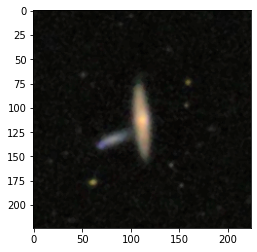

In [94]:
plt.imshow(image)
plt.show()

### OUTPUT EXAMPLE 2

In [87]:
imagepath='/content/sample_data/Galaxy/102433.jpg'
finalimage=preprocessing(imagepath)
image = PIL.Image.fromarray(finalimage, "RGB")
df=pd.read_csv('/content/sample_data/training_solutions_rev1.csv')
df_new = df[df['GalaxyID'] == int(imagepath[28:-4])]  
df_new

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
174,102433,0.007049,0.988113,0.004837,0.0,0.988113,0.056138,0.931975,0.988113,0.0,0.039194,0.682077,0.266843,0.0,0.042385,0.957615,0.007049,0.0,0.0,0.021192,0.0,0.0,0.021192,0.0,0.0,0.0,0.0,0.0,0.0,0.83517,0.152943,0.0,0.0,0.363,0.585549,0.019782,0.019782,0.0


In [88]:
predictarray=prediction(image)
predictdf = pd.DataFrame(data = predictarray,columns = classes)
predictdf

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,0.044834,0.947369,0.006146,0.013804,0.928845,0.157244,0.771253,0.84424,0.084067,0.06501,0.555234,0.285671,0.03598,0.216685,0.783394,0.017274,0.022656,0.000685,0.033069,0.010975,0.063206,0.052532,0.042912,0.017937,0.001396,0.01044,0.000743,0.002544,0.424895,0.368512,0.075703,0.031554,0.325668,0.197612,0.092547,0.059445,0.191588


In [89]:
getfeatures()

The predicted features of the image are - 

The Galaxy Has Features/Disk
The Disk Cannot Be Viewed Edge-on
There Is No Sign Of A Bar Feature Through The Centre Of The Galaxy
There Is A Sign Of A Spiral Arm Pattern
The Spiral Arms Appear To Be Tightly Wound
The Galaxy Has 2 Spiral Arms


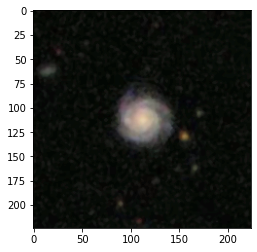

In [90]:
plt.imshow(image)
plt.show()

### OUTPUT EXAMPLE 3 (FROM TEST SET)

In [101]:
imagepath='/content/sample_data/Galaxy/101317.jpg'
finalimage=preprocessing(imagepath)
image = PIL.Image.fromarray(finalimage, "RGB")
predictarray=prediction(image)
predictdf = pd.DataFrame(data = predictarray,columns = classes)
predictdf

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,0.039377,0.952385,0.007544,0.017893,0.932611,0.260467,0.680125,0.835363,0.097232,0.114898,0.567726,0.239918,0.037867,0.30937,0.69027,0.007584,0.025468,0.001246,0.030199,0.012072,0.091354,0.104357,0.06042,0.03674,0.001484,0.012554,0.000937,0.003393,0.279853,0.433986,0.16596,0.041205,0.501486,0.144915,0.045363,0.022243,0.133571


In [102]:
getfeatures()

The predicted features of the image are - 

The Galaxy Has Features/Disk
The Disk Cannot Be Viewed Edge-on
There Is No Sign Of A Bar Feature Through The Centre Of The Galaxy
There Is A Sign Of A Spiral Arm Pattern
The Spiral Arms Appear To Be Neither Tightly Nor Loosely Wound (Medium)
The Galaxy Has 2 Spiral Arms


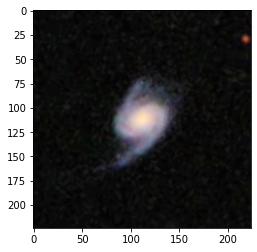

In [103]:
plt.imshow(image)
plt.show()